# Deep Learning - Wprowadzenie

## Czym jest Deep Learning?

**Deep Learning** (Głębokie Uczenie) to poddziedzina Machine Learning, która wykorzystuje **sieci neuronowe z wieloma warstwami** (stąd "głębokie") do uczenia się reprezentacji danych.

### Kluczowe koncepcje:

1. **Sieci Neuronowe (Neural Networks)**
   - Inspirowane biologicznym mózgiem
   - Składają się z neuronów połączonych w warstwy
   - Każdy neuron wykonuje prostą operację matematyczną

2. **Warstwy (Layers)**
   - **Input Layer** - przyjmuje dane wejściowe
   - **Hidden Layers** - przetwarzają dane (tu dzieje się "magia")
   - **Output Layer** - generuje wynik/predykcję

3. **Uczenie przez Backpropagation**
   - Sieć "uczy się" przez dostosowywanie wag połączeń
   - Algorytm wstecznej propagacji błędu
   - Gradient descent - minimalizacja funkcji straty

### Dlaczego Deep Learning działa tak dobrze?

- **Automatyczne wydobywanie cech** - nie trzeba ręcznie projektować cech
- **Hierarchiczne uczenie** - każda warstwa uczy się coraz bardziej abstrakcyjnych reprezentacji
- **Skalowalność** - im więcej danych, tym lepsze wyniki
- **Transfer learning** - można wykorzystać wytrenowane modele

### Zastosowania:
- 🖼️ Rozpoznawanie obrazów
- 🗣️ Przetwarzanie języka naturalnego (NLP)
- 🎵 Generowanie muzyki i sztuki
- 🚗 Pojazdy autonomiczne
- 🏥 Diagnostyka medyczna
- 🎮 Gry (AlphaGo, ChatGPT)

## Praktyczny eksperyment: Rozpoznawanie obrazów CIFAR-10

Użyjemy **CIFAR-10** - popularnego zbioru danych zawierającego 60,000 kolorowych obrazków 32x32 pikseli w 10 klasach:

1. ✈️ Samoloty (airplane)
2. 🚗 Samochody (automobile)
3. 🐦 Ptaki (bird)
4. 🐱 Koty (cat)
5. 🦌 Jelenie (deer)
6. 🐕 Psy (dog)
7. 🐸 Żaby (frog)
8. 🐴 Konie (horse)
9. 🚢 Statki (ship)
10. 🚚 Ciężarówki (truck)

**Na razie używamy tylko CPU** - w kolejnym notebooku przeniesiemy na GPU!

In [6]:
# Import bibliotek
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import time

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print("\n⚠️ W tym notebooku używamy TYLKO CPU")

PyTorch version: 2.6.0+cu124
CUDA available: True

⚠️ W tym notebooku używamy TYLKO CPU


In [ ]:
# Instalacja PyTorch z CUDA (uruchom tylko raz)
# Odkomentuj i uruchom jeśli PyTorch nie jest zainstalowany
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
  Using cached https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached https://download.pytorch.org/whl/filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp312-cp312-win_amd64.whl (2532.3 MB)
Using cached https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp312-cp312-win_


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Przygotowanie danych

### Transformacje danych
- **ToTensor()** - konwertuje obrazki PIL do tensorów PyTorch
- **Normalize()** - normalizuje piksele do zakresu [-1, 1] (ułatwia uczenie)

In [7]:
# Definicja transformacji
transform = transforms.Compose([
    transforms.ToTensor(),  # Konwersja do tensora [0, 1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizacja do [-1, 1]
])

# Pobieranie danych CIFAR-10
print("Pobieranie danych treningowych...")
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=transform
)

print("Pobieranie danych testowych...")
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=transform
)

# DataLoader - ładuje dane w "batch'ach" (porcjach)
batch_size = 64

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,  # Losowe mieszanie danych
    num_workers=2
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=2
)

# Nazwy klas
classes = ['samolot', 'samochód', 'ptak', 'kot', 'jeleń', 
           'pies', 'żaba', 'koń', 'statek', 'ciężarówka']

print(f"\n✓ Dane załadowane!")
print(f"  Treningowe: {len(train_dataset)} obrazków")
print(f"  Testowe: {len(test_dataset)} obrazków")
print(f"  Batch size: {batch_size}")
print(f"  Liczba klas: {len(classes)}")

Pobieranie danych treningowych...


100%|██████████| 170M/170M [00:07<00:00, 24.3MB/s] 



Pobieranie danych testowych...

✓ Dane załadowane!
  Treningowe: 50000 obrazków
  Testowe: 10000 obrazków
  Batch size: 64
  Liczba klas: 10

✓ Dane załadowane!
  Treningowe: 50000 obrazków
  Testowe: 10000 obrazków
  Batch size: 64
  Liczba klas: 10


## 2. Wizualizacja danych

Zobaczmy jak wyglądają nasze dane!

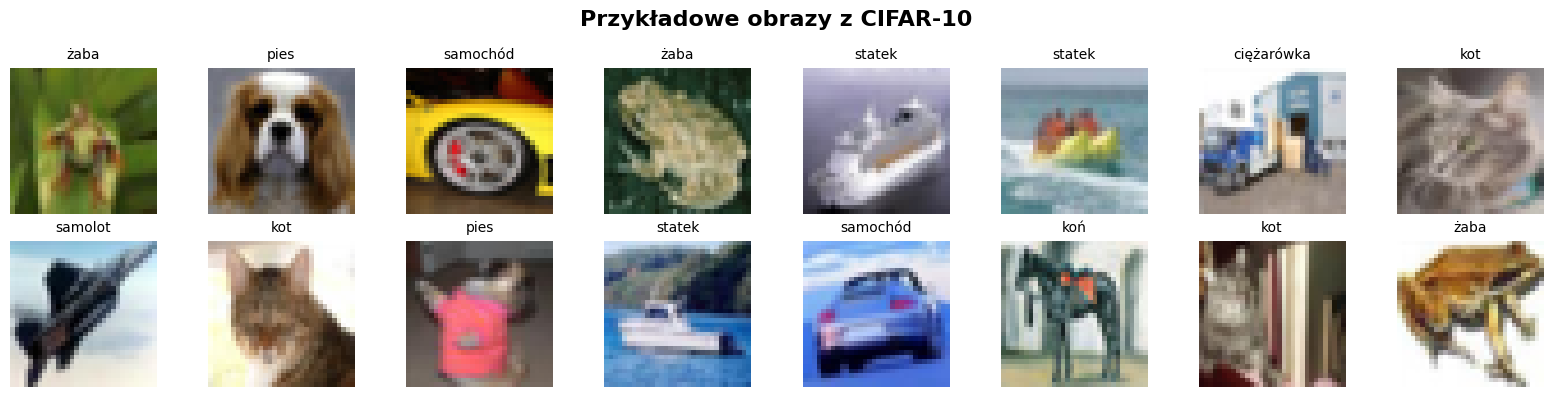


Kształt pojedynczego obrazka: torch.Size([3, 32, 32])
  - 3 kanały (RGB)
  - 32x32 pikseli
  - Razem: 3072 = 3072 wartości wejściowych


In [8]:
def imshow(img, title=None):
    """Funkcja do wyświetlania obrazków"""
    img = img / 2 + 0.5  # denormalizacja z [-1, 1] do [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')

# Pobierz jeden batch danych
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Wyświetl kilka przykładów
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
fig.suptitle('Przykładowe obrazy z CIFAR-10', fontsize=16, fontweight='bold')

for idx in range(16):
    ax = axes[idx // 8, idx % 8]
    img = images[idx] / 2 + 0.5  # denormalizacja
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(classes[labels[idx]], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\nKształt pojedynczego obrazka: {images[0].shape}")
print(f"  - 3 kanały (RGB)")
print(f"  - 32x32 pikseli")
print(f"  - Razem: {3 * 32 * 32} = 3072 wartości wejściowych")

## 3. Definicja sieci neuronowej

### Architektura CNN (Convolutional Neural Network)

Użyjemy **sieci konwolucyjnej** - najlepszej dla obrazów:

```
Input (3x32x32) 
    ↓
Conv2D (6 filtrów 5x5) → ReLU → MaxPool (2x2)
    ↓
Conv2D (16 filtrów 5x5) → ReLU → MaxPool (2x2)
    ↓
Flatten (spłaszczenie do wektora)
    ↓
Fully Connected (120 neuronów) → ReLU
    ↓
Fully Connected (84 neurony) → ReLU
    ↓
Output (10 klas)
```

### Kluczowe warstwy:
- **Conv2D** - wykrywa lokalne wzorce (krawędzie, tekstury)
- **ReLU** - funkcja aktywacji (wprowadza nieliniowość)
- **MaxPool** - redukuje wymiary, zachowując ważne cechy
- **Fully Connected** - łączy wszystkie cechy dla klasyfikacji


---

## 🧱 1. Wejście: `Input (3x32x32)`

To znaczy, że sieć przyjmuje **obrazek** o:

* **3 kanałach** (czyli kolory RGB — czerwony, zielony, niebieski),
* **32x32 pikselach** (szerokość i wysokość).

Czyli każdy obrazek to po prostu trójwymiarowa tablica liczb (intensywności kolorów).

---

## 🔍 2. `Conv2D (6 filtrów 5x5)`

### Co to jest „Conv2D”?

To **warstwa konwolucyjna** — serce sieci CNN.
Zamiast patrzeć na cały obraz na raz, CNN „patrzy” na małe kawałki (np. 5x5 pikseli) i uczy się **rozpoznawać wzory** (np. krawędzie, tekstury, kolory).

### Co robi filtr 5x5?

* „Filtr” (ang. *kernel*) to mała macierz, np. 5x5 liczb.
* Przesuwasz go po obrazie i liczysz, jak bardzo dany fragment pasuje do wzoru, którego filtr się nauczył.
* Każdy filtr wykrywa coś innego (np. pionowe krawędzie, poziome krawędzie, plamy koloru, zakrzywienia itd.).

### Dlaczego 6 filtrów?

* Bo sieć ma się nauczyć **6 różnych rodzajów wzorców** na tym etapie.
* Każdy filtr tworzy tzw. **mapę cech** (feature map).
  Więc po tej warstwie masz 6 obrazków (każdy pokazuje inne cechy).

---

## ⚡ 3. `ReLU`

To funkcja aktywacji: **Rectified Linear Unit**.
Formuła:
[
ReLU(x) = \max(0, x)
]

Czyli wszystko, co jest ujemne, zamienia na 0.
To sprawia, że sieć uczy się nieliniowych zależności (bo świat nie jest liniowy 😊).

---

## 💧 4. `MaxPool (2x2)`

To **warstwa próbkowania (pooling)**.
Zasada:

* Patrzy na mały fragment 2x2 i wybiera **największą wartość**.
* Dzięki temu zmniejsza rozmiar obrazu (np. z 32x32 → 16x16),
  ale zachowuje najważniejsze informacje (gdzie są silne cechy).

Efekt:

* Mniej danych → szybciej działa.
* Odporność na drobne przesunięcia (np. obiekt trochę przesunięty w obrazie).

---

## 🔁 5. Kolejna warstwa `Conv2D (16 filtrów 5x5) → ReLU → MaxPool (2x2)`

To kolejny etap, gdzie sieć:

* patrzy na poprzednie „mapy cech” (czyli już nie surowy obraz, tylko wyłuskane wzory),
* i szuka **bardziej złożonych wzorców**, np. rogów, kształtów, oczu, cyfr, itp.

Teraz jest 16 filtrów, więc sieć ma 16 rodzajów cech na tym etapie.

---

## 📏 6. `Flatten`

To po prostu „spłaszczenie” wszystkich map cech do jednej długiej listy liczb.
Wyobraź sobie, że rozciągasz każdy z 16 obrazków i łączysz je w jeden wektor.
To przygotowanie do klasycznych warstw neuronowych (Fully Connected).

---

## 🧠 7. `Fully Connected (120 neuronów) → ReLU`

To już zwykła warstwa sieci neuronowej — każdy neuron łączy się ze wszystkimi wartościami z poprzedniej warstwy.
Te neurony uczą się rozpoznawać **kombinacje cech** (np. „jeśli widzę kółko i dwie linie, to może być 8”).

---

## 🧠 8. `Fully Connected (84 neurony) → ReLU`

Kolejna warstwa — jeszcze bardziej abstrakcyjna.
Tu sieć łączy wzorce z poprzedniej warstwy w coś jeszcze wyższego poziomu, np. „to wygląda jak cyfra 8”.

---

## 🎯 9. `Output (10 klas)`

Na końcu jest 10 neuronów — każdy odpowiada jednej **klasie**, np. cyfrze od 0 do 9.

Największa wartość = przewidywana klasa (np. neuron nr 3 ma najwyższy wynik → sieć uważa, że to „3”).

---

## 🔎 Wizualnie:

```
Obraz (3x32x32)
  ↓
[Filtry uczą się wzorców → krawędzie, kolory]
  ↓
Zmniejszanie rozmiaru → 16x8x8
  ↓
[Uczenie się kształtów i kombinacji]
  ↓
120 → 84 → 10
  ↓
Wynik: np. "to jest cyfra 8"
```

---

## 🌟 Podsumowanie (intuicyjnie)

| Warstwa         | Co robi                  | Efekt                      |
| --------------- | ------------------------ | -------------------------- |
| Conv2D          | Szuka wzorców w obrazie  | wykrywa np. krawędzie      |
| ReLU            | Usuwa wartości ujemne    | wprowadza nieliniowość     |
| MaxPool         | Zmniejsza obraz          | upraszcza dane             |
| Flatten         | Spłaszcza dane           | przygotowuje do warstwy FC |
| Fully Connected | Uczy się kombinacji cech | rozpoznaje obiekt          |
| Output          | Zwraca wynik             | wybiera klasę              |

---


In [9]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Warstwy konwolucyjne
        self.conv1 = nn.Conv2d(
            in_channels=3,    # RGB (3 kanały)
            out_channels=6,   # 6 filtrów
            kernel_size=5     # Filtr 5x5
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling 2x2
        
        self.conv2 = nn.Conv2d(
            in_channels=6,    # Z poprzedniej warstwy
            out_channels=16,  # 16 filtrów
            kernel_size=5
        )
        
        # Warstwy fully connected
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 16 filtrów, każdy 5x5 po poolingu
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 klas wyjściowych
        
        # Funkcja aktywacji
        self.relu = nn.ReLU()
    
    def forward(self, x):
        """Przepływ danych przez sieć (forward pass)"""
        # Pierwsza warstwa konwolucyjna
        x = self.pool(self.relu(self.conv1(x)))
        
        # Druga warstwa konwolucyjna
        x = self.pool(self.relu(self.conv2(x)))
        
        # Spłaszczenie (flatten)
        x = x.view(-1, 16 * 5 * 5)
        
        # Warstwy fully connected
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Bez ReLU w ostatniej warstwie
        
        return x

# Utworzenie modelu (NA CPU!)
device = torch.device('cpu')
print(f"Używamy urządzenia: {device}")

model = SimpleCNN().to(device)
print("\n✓ Model utworzony!\n")
print(model)

# Policzmy parametry
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nLiczba parametrów:")
print(f"  Wszystkie: {total_params:,}")
print(f"  Trenowalne: {trainable_params:,}")

Używamy urządzenia: cpu

✓ Model utworzony!

SimpleCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)

Liczba parametrów:
  Wszystkie: 62,006
  Trenowalne: 62,006


## 4. Konfiguracja treningu

### Funkcja straty (Loss Function)
- **CrossEntropyLoss** - standardowa dla klasyfikacji wieloklasowej
- Mierzy "jak bardzo" się mylimy

### Optymalizator
- **SGD (Stochastic Gradient Descent)** z momentum
- Aktualizuje wagi sieci w kierunku minimalizacji straty
- **Learning rate** = 0.001 - "szybkość uczenia"

In [10]:
# Funkcja straty
criterion = nn.CrossEntropyLoss()

# Optymalizator
optimizer = optim.SGD(
    model.parameters(), 
    lr=0.001,      # Learning rate
    momentum=0.9   # Momentum - "rozpęd" w kierunku gradientu
)

print("✓ Konfiguracja treningu gotowa!")
print(f"  Funkcja straty: CrossEntropyLoss")
print(f"  Optymalizator: SGD")
print(f"  Learning rate: 0.001")
print(f"  Momentum: 0.9")

✓ Konfiguracja treningu gotowa!
  Funkcja straty: CrossEntropyLoss
  Optymalizator: SGD
  Learning rate: 0.001
  Momentum: 0.9


## 5. Trening modelu

### Jak działa trening?

Dla każdej **epoki** (pełne przejście przez dane):
1. **Forward pass** - przepuść dane przez sieć
2. **Oblicz stratę** - jak bardzo się mylimy?
3. **Backward pass** - oblicz gradienty (backpropagation)
4. **Update wag** - popraw parametry sieci
5. **Powtarzaj** dla każdego batcha

⏱️ **UWAGA**: Na CPU to może trwać kilka minut!

In [11]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    """
    Funkcja trenująca model
    """
    model.train()  # Tryb treningowy
    
    history = {
        'loss': [],
        'accuracy': []
    }
    
    total_start = time.time()
    
    for epoch in range(num_epochs):
        epoch_start = time.time()
        running_loss = 0.0
        correct = 0
        total = 0
        
        print(f"\nEpoka {epoch + 1}/{num_epochs}")
        print("-" * 60)
        
        for i, (images, labels) in enumerate(train_loader):
            # Przenieś dane na urządzenie (CPU)
            images, labels = images.to(device), labels.to(device)
            
            # 1. Wyzeruj gradienty
            optimizer.zero_grad()
            
            # 2. Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 3. Backward pass
            loss.backward()
            
            # 4. Update wag
            optimizer.step()
            
            # Statystyki
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Wyświetl postęp co 100 batchy
            if (i + 1) % 100 == 0:
                avg_loss = running_loss / 100
                accuracy = 100 * correct / total
                print(f"  Batch [{i + 1}/{len(train_loader)}] | "
                      f"Loss: {avg_loss:.4f} | Accuracy: {accuracy:.2f}%")
                running_loss = 0.0
        
        # Statystyki po epoce
        epoch_time = time.time() - epoch_start
        epoch_accuracy = 100 * correct / total
        
        history['loss'].append(running_loss / len(train_loader))
        history['accuracy'].append(epoch_accuracy)
        
        print(f"\n  Czas epoki: {epoch_time:.2f}s")
        print(f"  Accuracy epoki: {epoch_accuracy:.2f}%")
    
    total_time = time.time() - total_start
    print(f"\n{'='*60}")
    print(f"✓ Trening zakończony!")
    print(f"  Całkowity czas: {total_time:.2f}s ({total_time/60:.2f} min)")
    print(f"  Średni czas na epokę: {total_time/num_epochs:.2f}s")
    
    return history

# TRENUJ MODEL
print("🚀 Rozpoczynam trening na CPU...")
print("⏱️ To może potrwać kilka minut...\n")

num_epochs = 5
history = train_model(model, train_loader, criterion, optimizer, num_epochs)

🚀 Rozpoczynam trening na CPU...
⏱️ To może potrwać kilka minut...


Epoka 1/5
------------------------------------------------------------
  Batch [100/782] | Loss: 2.3065 | Accuracy: 9.94%
  Batch [100/782] | Loss: 2.3065 | Accuracy: 9.94%
  Batch [200/782] | Loss: 2.3037 | Accuracy: 10.07%
  Batch [200/782] | Loss: 2.3037 | Accuracy: 10.07%
  Batch [300/782] | Loss: 2.3023 | Accuracy: 10.05%
  Batch [300/782] | Loss: 2.3023 | Accuracy: 10.05%
  Batch [400/782] | Loss: 2.2991 | Accuracy: 9.96%
  Batch [400/782] | Loss: 2.2991 | Accuracy: 9.96%
  Batch [500/782] | Loss: 2.2977 | Accuracy: 10.18%
  Batch [500/782] | Loss: 2.2977 | Accuracy: 10.18%
  Batch [600/782] | Loss: 2.2941 | Accuracy: 10.39%
  Batch [600/782] | Loss: 2.2941 | Accuracy: 10.39%
  Batch [700/782] | Loss: 2.2866 | Accuracy: 10.72%
  Batch [700/782] | Loss: 2.2866 | Accuracy: 10.72%

  Czas epoki: 10.30s
  Accuracy epoki: 11.44%

Epoka 2/5
------------------------------------------------------------

  Czas epoki: 10.

## 6. Wizualizacja procesu uczenia

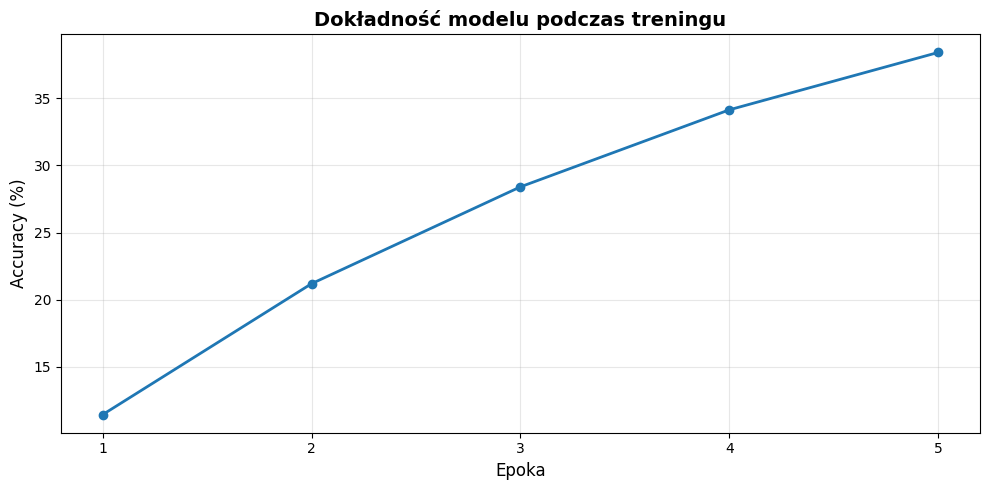

Końcowa accuracy na danych treningowych: 38.41%


In [12]:
# Wykres accuracy w czasie treningu
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), history['accuracy'], marker='o', linewidth=2)
plt.title('Dokładność modelu podczas treningu', fontsize=14, fontweight='bold')
plt.xlabel('Epoka', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, num_epochs + 1))
plt.tight_layout()
plt.show()

print(f"Końcowa accuracy na danych treningowych: {history['accuracy'][-1]:.2f}%")

## 7. Ewaluacja na danych testowych

Sprawdźmy jak model radzi sobie z **nowymi, niewidzianymi wcześniej** danymi!

In [13]:
def evaluate_model(model, test_loader):
    """
    Ewaluacja modelu na danych testowych
    """
    model.eval()  # Tryb ewaluacji
    
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    
    print("Ewaluacja modelu...")
    
    with torch.no_grad():  # Nie obliczaj gradientów (szybciej)
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Statystyki per klasa
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
    # Wyniki
    overall_accuracy = 100 * correct / total
    
    print(f"\n{'='*60}")
    print(f"WYNIKI NA DANYCH TESTOWYCH")
    print(f"{'='*60}")
    print(f"\nOgólna dokładność: {overall_accuracy:.2f}%")
    print(f"  Poprawnie: {correct}/{total}")
    
    print(f"\nDokładność per klasa:")
    print("-" * 40)
    for i in range(10):
        acc = 100 * class_correct[i] / class_total[i]
        print(f"  {classes[i]:12s}: {acc:5.2f}%  ({class_correct[i]}/{class_total[i]})")
    
    return overall_accuracy

test_accuracy = evaluate_model(model, test_loader)

Ewaluacja modelu...

WYNIKI NA DANYCH TESTOWYCH

Ogólna dokładność: 39.93%
  Poprawnie: 3993/10000

Dokładność per klasa:
----------------------------------------
  samolot     : 28.10%  (281/1000)
  samochód    : 48.80%  (488/1000)
  ptak        : 10.10%  (101/1000)
  kot         : 28.60%  (286/1000)
  jeleń       : 29.20%  (292/1000)
  pies        : 39.80%  (398/1000)
  żaba        : 47.50%  (475/1000)
  koń         : 58.10%  (581/1000)
  statek      : 46.20%  (462/1000)
  ciężarówka  : 62.90%  (629/1000)

WYNIKI NA DANYCH TESTOWYCH

Ogólna dokładność: 39.93%
  Poprawnie: 3993/10000

Dokładność per klasa:
----------------------------------------
  samolot     : 28.10%  (281/1000)
  samochód    : 48.80%  (488/1000)
  ptak        : 10.10%  (101/1000)
  kot         : 28.60%  (286/1000)
  jeleń       : 29.20%  (292/1000)
  pies        : 39.80%  (398/1000)
  żaba        : 47.50%  (475/1000)
  koń         : 58.10%  (581/1000)
  statek      : 46.20%  (462/1000)
  ciężarówka  : 62.90%  (629/

## 8. Predykcje na przykładach

Zobaczmy jak model klasyfikuje konkretne obrazy!

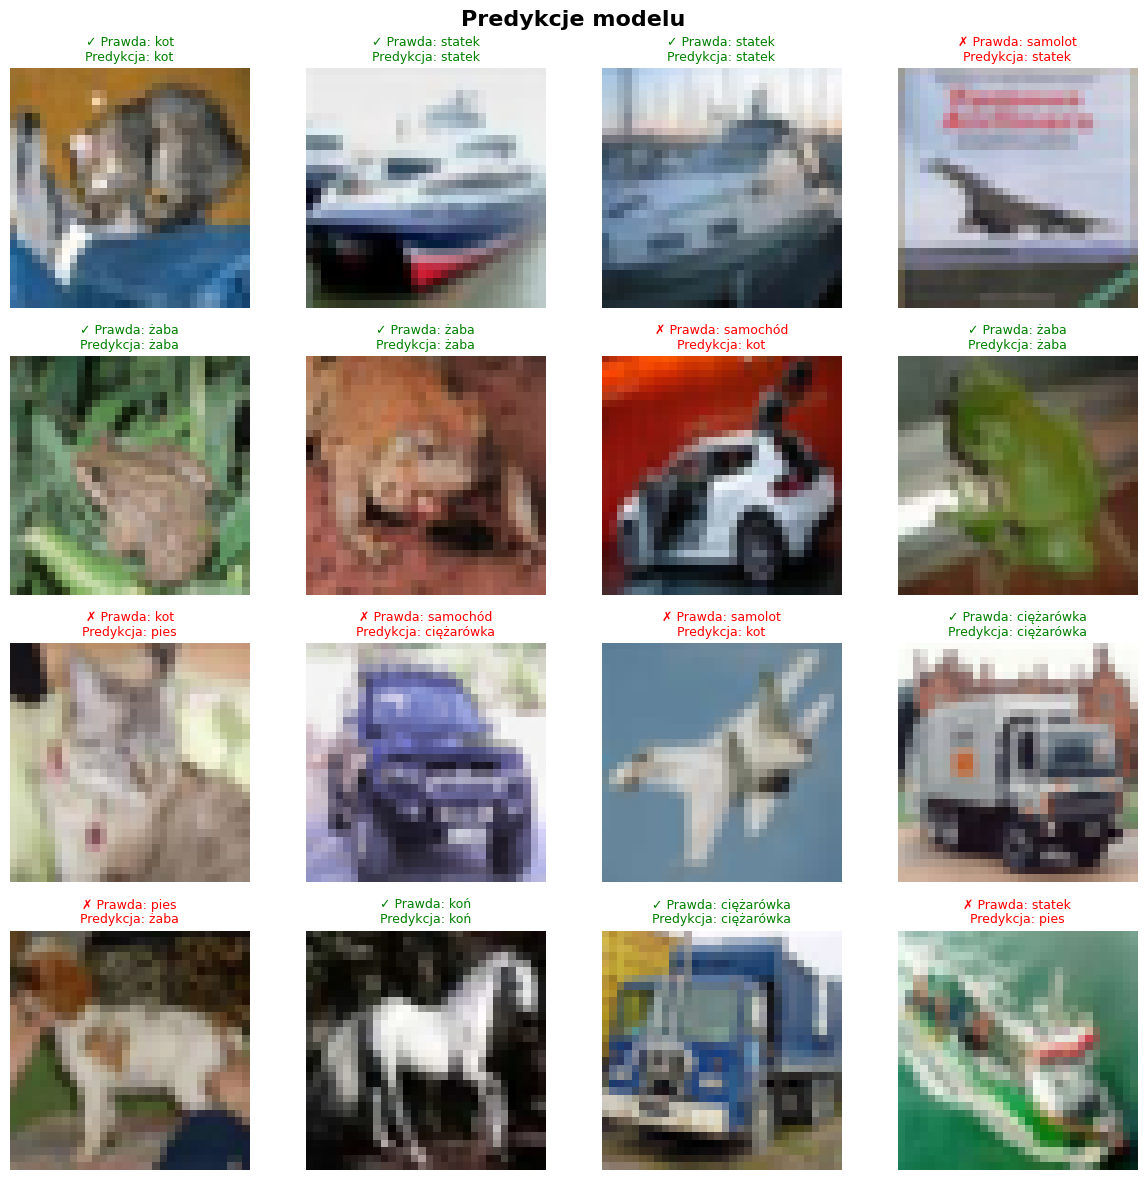

In [14]:
def show_predictions(model, test_loader, num_images=16):
    """
    Wyświetl predykcje modelu dla przykładowych obrazów
    """
    model.eval()
    
    # Pobierz batch danych
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    
    # Predykcje
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
    
    # Wizualizacja
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle('Predykcje modelu', fontsize=16, fontweight='bold')
    
    for idx in range(num_images):
        ax = axes[idx // 4, idx % 4]
        
        # Wyświetl obraz
        img = images[idx].cpu() / 2 + 0.5  # denormalizacja
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        
        # Tytuł z predykcją
        true_label = classes[labels[idx]]
        pred_label = classes[predicted[idx]]
        
        if labels[idx] == predicted[idx]:
            color = 'green'
            symbol = '✓'
        else:
            color = 'red'
            symbol = '✗'
        
        ax.set_title(f"{symbol} Prawda: {true_label}\nPredykcja: {pred_label}", 
                    fontsize=9, color=color)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

show_predictions(model, test_loader, num_images=16)

## 9. Podsumowanie i wnioski

### Co się nauczyliśmy?

1. **Deep Learning to hierarchiczne uczenie**
   - Pierwsze warstwy uczą się prostych wzorców (krawędzie)
   - Głębsze warstwy łączą je w bardziej złożone cechy
   - Ostatnie warstwy rozpoznają kompletne obiekty

2. **CNN są idealne dla obrazów**
   - Warstwy konwolucyjne wykrywają lokalne wzorce
   - Pooling redukuje wymiary i zwiększa odporność
   - Fully connected łączy wszystko dla klasyfikacji

3. **Proces treningu**
   - Forward pass → oblicz stratę → backward pass → update wag
   - Powtarzamy wiele epok aż model się nauczy
   - Monitorujemy accuracy i loss

4. **CPU vs GPU**
   - Na CPU trening jest **wolny** ⏱️
   - Na GPU będzie **10-20x szybciej** 🚀
   - To samo kod - tylko zmiana `device='cuda'`

### Typowe wyniki dla CIFAR-10:
- **Prosta CNN (nasza)**: ~60-70% accuracy
- **Głębsze sieci (ResNet)**: ~90-95% accuracy
- **State-of-the-art**: ~99% accuracy

### Co dalej?
- ✅ Zrozumieliśmy podstawy Deep Learning
- 🚀 Następny krok: **Użycie GPU** dla przyspieszenia!
- 📈 Możemy trenować większe modele i więcej epok
- 🎯 Eksperymentować z różnymi architekturami

## 🎓 Kluczowe pojęcia - powtórka

| Pojęcie | Wyjaśnienie |
|---------|-------------|
| **Epoch** | Jedno pełne przejście przez wszystkie dane treningowe |
| **Batch** | Porcja danych przetwarzana jednocześnie (np. 64 obrazy) |
| **Forward pass** | Przepływ danych przez sieć "do przodu" |
| **Backward pass** | Obliczanie gradientów "wstecz" (backpropagation) |
| **Loss** | Funkcja straty - mierzy jak bardzo się mylimy |
| **Optimizer** | Algorytm aktualizujący wagi (SGD, Adam, etc.) |
| **Learning rate** | "Szybkość uczenia" - jak duże kroki robimy |
| **Gradient** | Kierunek w którym strata rośnie najszybciej |
| **Overfitting** | Model "pamięta" dane treningowe zamiast się uczyć |
| **Underfitting** | Model jest zbyt prosty i nie może się nauczyć |

In [15]:
# Zapisz model (opcjonalnie)
torch.save(model.state_dict(), 'cifar10_simple_cnn.pth')
print("✓ Model zapisany jako 'cifar10_simple_cnn.pth'")
print("\nMożesz go później załadować:")
print("  model.load_state_dict(torch.load('cifar10_simple_cnn.pth'))")

✓ Model zapisany jako 'cifar10_simple_cnn.pth'

Możesz go później załadować:
  model.load_state_dict(torch.load('cifar10_simple_cnn.pth'))
